# Projeto 1 - Relatório de fechamento de mercado por e-mail.


### Desafio:

* Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar.

### Passo a passo:

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Pegar dados do Ibovespa e do Dólar no Yahoo Finance.
   
   **Passo 3** - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
   
   **Passo 4** - Calcular o retorno diário, mensal e anual.
   
   **Passo 5** - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto  anexado no e-mail.
   
   **Passo 6** - Fazer os gráficos dos ativos.
   
   **Passo 7** - Enviar o e-mail para brenno@varos.com.br


In [1]:
# Biblioteca que trabalha com uma forma de ocultar variaveis de ambiente sensiveis, como e-mail e senha

!pip install python-dotenv

In [2]:
# Biblioteca para importação de dados financeiros Yahoo Finance

!pip install yfinance==0.1.74

In [3]:
# Biblioteca para personalizar design dos graficos

!pip install mplcyberpunk

# Passo 1: Importando os módulos necessários

In [4]:
# Biblioteca que trabalha com dados e dataframes
# Biblioteca que trabalha com datas
# Importando a biblioteca do Yahoo
# Biblioteca para plotar graficos
# Importando a biblioteca baixada para personalizar graficos
# Biblioteca que trabalha com auxilio para programação de envio de e-mails automaticos
# Biblioteca que trabalha com auxilio para programação de envio de e-mails automaticos

import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

# Passo 2: Pegar dados no Yahoo Finance

In [5]:
# Criando lista de ativos que desejo
ativos = ["^BVSP", "BRL=X"]

# Pegando a data atual
hoje = datetime.datetime.now()
# Buscando a data de um ano atrás
um_ano_atras = hoje - datetime.timedelta(days = 365)

# Printando as datas
print("Data de hoje: ", hoje)
print("Um ano atrás: ", um_ano_atras)

# Puxando tabela de dados dos ativos selecionados de um ano atrás até hoje.
dados_mercado = yf.download(ativos, um_ano_atras, hoje)

# display mostra de forma mais visual os dados, porém pode ser usado somente dentro do jupyter notebook
display(dados_mercado)

Data de hoje:  2023-04-10 23:44:12.418309
Um ano atrás:  2022-04-10 23:44:12.418309
[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-04-11    4.6981  116953.0  4.6981  116953.0  4.7326  118320.0  4.684016   
2022-04-12    4.6936  116147.0  4.6936  116147.0  4.6971  118615.0  4.621500   
2022-04-13    4.6731  116782.0  4.6731  116782.0  4.7023  117329.0  4.653200   
2022-04-14    4.6902  116182.0  4.6902  116182.0  4.7381  116781.0  4.669788   
2022-04-15    4.7010       NaN  4.7010       NaN  4.7100       NaN  4.696500   
...              ...       ...     ...       ...     ...       ...       ...   
2023-04-04    5.0631  101869.0  5.0631  101869.0  5.0976  103056.0  5.048277   
2023-04-05    5.0707  100978.0  5.0707  100978.0  5.0743  101960.0  5.027504   
2023-04-06    5.0332  100822.0  5.0332  100822.0  5.0789  101628.0  5.028911   
2023-04-07    5.0583       NaN  5.0583       NaN  5.0585       NaN  5.004350   
2023-04-10    5.0544  101847.0  5.0544  101847.0  5.0887  102196.0  5.045100   

                        Open           Volume              
               ^BVSP   BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                       
2022-04-11  116953.0  4.6980  118320.0      0   9558400.0  
2022-04-12  116054.0  4.6936  116963.0      0  11406800.0  
2022-04-13  116150.0  4.6731  116150.0      0  12070500.0  
2022-04-14  115624.0  4.6902  116781.0      0  10365400.0  
2022-04-15       NaN  4.7010       NaN      0         NaN  
...              ...     ...       ...    ...         ...  
2023-04-04  101505.0  5.0631  101505.0      0  11695800.0  
2023-04-05   99898.0  5.0707  101869.0      0  13256500.0  
2023-04-06  100443.0  5.0332  100978.0      0   9818500.0  
2023-04-07       NaN  5.0583       NaN      0         NaN  
2023-04-10  100819.0  5.0544  100822.0      0         0.0  

[261 rows x 12 columns]

# Passo 3.1: Manipulando os dados - seleção e exclusão de dados 

In [6]:
# Pegando isoladamente os dados de fechamento
dados_fechamento = dados_mercado['Adj Close']

# Renomeando as colunas de ativo
dados_fechamento.columns = ['dolar', 'ibovespa']

# limpandos os dados faltantes que estão como NaN, estes dados não existem devido a não abertura da bolsa.
dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-04-11,4.6981,116953.0
2022-04-12,4.6936,116147.0
2022-04-13,4.6731,116782.0
2022-04-14,4.6902,116182.0
2022-04-18,4.7006,115687.0
...,...,...
2023-04-03,5.0623,101506.0
2023-04-04,5.0631,101869.0
2023-04-05,5.0707,100978.0


# Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes. 

In [7]:
# Manipulando os dados para exibir os dados de fechamento mensal
dados_fechamento_mensal = dados_fechamento.resample("M").last()

dados_fechamento_mensal

,dolar,ibovespa
Date,,
2022-04-30,4.9378,107876.0
2022-05-31,4.7524,111351.0
2022-06-30,5.1809,98542.0
2022-07-31,5.1827,103165.0
2022-08-31,5.1219,109523.0
2022-09-30,5.3962,110037.0
2022-10-31,5.2885,116037.0
2022-11-30,5.2682,112486.0
2022-12-31,5.2668,110031.0


In [8]:
# Manipulando os dados para exibir os dados de fechamento anual
dados_fechamento_anual = dados_fechamento.resample("Y").last()

dados_fechamento_anual

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.0544,101847.0


# Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos. 

In [9]:
#Utilizando a função pct.change para calcular a porcentagem de retorno para cada timeframe.
# OBS: função dropna está sendo utilizada pois não há dados para o primeiro item.

retorno_diario = dados_fechamento.pct_change().dropna()
retorno_mensal = dados_fechamento_mensal.pct_change().dropna()
retorno_anual = dados_fechamento_anual.pct_change().dropna()

In [10]:
retorno_diario

,dolar,ibovespa
Date,,
2022-04-12,-0.000958,-0.006892
2022-04-13,-0.004368,0.005467
2022-04-14,0.003659,-0.005138
2022-04-18,0.002217,-0.004261
2022-04-19,-0.010339,-0.005446
...,...,...
2023-04-03,-0.005969,-0.003691
2023-04-04,0.000158,0.003576
2023-04-05,0.001501,-0.008747


In [11]:
retorno_mensal

,dolar,ibovespa
Date,,
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602
2022-12-31,-0.000266,-0.021825
2023-01-31,-0.028841,0.031818


In [12]:
retorno_anual

,dolar,ibovespa
Date,,
2023-12-31,-0.040328,-0.074379


# Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.

* Loc -> referenciar elementos a partir do nome
* Iloc -> selecionar elementos como uma matriz

### Retornos diarios - Dolar e Ibovespa

In [13]:
retorno_dia_dolar = retorno_diario.iloc[-1, 0]
retorno_dia_ibov = retorno_diario.iloc[-1, 1]

print("retorno diario do dolar: ", retorno_dia_dolar)
print("retorno diario do Ibovespa: ", retorno_dia_ibov)

retorno diario do dolar:  0.0042120680581523295
retorno diario do Ibovespa:  0.010166431929539144


In [14]:
# Tratando os dados para arrendondar a porcentagem e trazer somente duas casas decimais

retorno_dia_dolar = round(retorno_dia_dolar * 100, 2)

retorno_dia_ibov = round(retorno_dia_ibov * 100, 2)

### Retornos mensais - Dolar e Ibovespa

In [15]:
retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

print("retorno mensal do dolar: ", retorno_mensal_dolar)
print("retorno mensal do Ibovespa: ", retorno_mensal_ibov)

retorno mensal do dolar:  -0.007520575991047385
retorno mensal do Ibovespa:  -0.000343534677371915


In [16]:
# Tratando os dados para arrendondar a porcentagem e trazer somente duas casas decimais

retorno_mensal_dolar = round(retorno_mensal_dolar * 100, 2)

retorno_mensal_ibov = round(retorno_mensal_ibov * 100, 2)

### Retorno anual - Dolar e Ibovespa

In [17]:
retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]


print("retorno anual do dolar: ", retorno_anual_dolar)
print("retorno anual do Ibovespa: ", retorno_anual_ibov)

retorno anual do dolar:  -0.040328085843002626
retorno anual do Ibovespa:  -0.07437903863456663


In [18]:
# Tratando os dados para arrendondar a porcentagem e trazer somente duas casas decimais

retorno_anual_dolar = round(retorno_anual_dolar * 100, 2)

retorno_anual_ibov = round(retorno_anual_ibov * 100, 2)

# Passo 6 - Fazer os gráficos da performance do último dos ativos

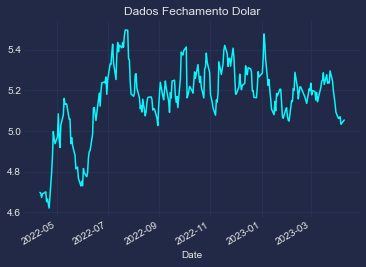

In [19]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "dolar", use_index = True, legend = False)

plt.title("Dados Fechamento Dolar")

plt.savefig("Dolar.png", dpi = 300)

plt.show()

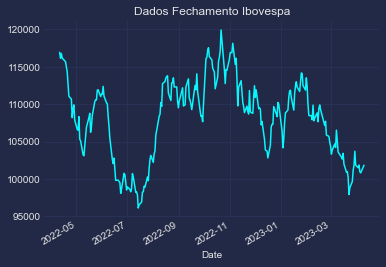

In [20]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False)

plt.title("Dados Fechamento Ibovespa")

plt.savefig("Ibovespa.png", dpi = 300)

plt.show()

# Passo 7: Enviar e-mail

https://myaccount.google.com/apppasswords

In [21]:
# Pacote de gerenciamento de variaveis locais no python
import os
from dotenv import load_dotenv

In [22]:
load_dotenv()

True

In [23]:
# Recebendo a senha do e-mail que está em um arquivo .env no meu computador

senha = os.environ.get("senha")
email = 'leogrochoski10@gmail.com'

In [34]:
# Preparando para enviar e-mail, setando assunto, e-mail de envio e destinatario.

msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com o Python"
msg['From'] = 'leogrochoski10@gmail.com'
msg['To'] = 'brenno@varos.com.br'

# Setando mensagem enviada no corpo do e-mail

msg.set_content(f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibov}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibov}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.


Abs,

O melhor estagiário do mundo

''')

In [35]:
# Incluindo anexos ao e-mail

with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [36]:
# Conectando ao servidor google e enviando e-mail

with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)